# Task 1

In [2]:
## import modules 
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
ciphertext = """Oirmf qjff nfrh ub wf n bsbrjab bjvsriffn bzjotnu gzbpcfen ja oir ndujpyn uuztr ybln dbidrmory
xvoi opjyyjab dudmqmfa nfya ffofrh. Srrbeyjab uuz dudmqmfa ape nibrjab qnojridr voq  fjayornt, sjs ydtgzovih nouriuvqfyt, bay gbm
jzksbqjab uuzje xpzhvaddnojbit ffjygt, vn crdot ptry ja hbat tpcpbgt, zjtg ztczdvvmyt qez-tpcpbgt"""

answer = """There does seem to be a growing awareness amongst teachers in the schools these days concerned
with building children self esteem. Rewarding the children for showing patience and  kindness, for listening attentively, and for
improving their communications skills, is being used in many schools, most especially pre-schools"""

#key = "VBN"

#cipher = "vignere"

# single characters: n -> i,a
# vn -> _i,_a - pi? not common
# repeating chars: uu

# Initial Frequency Analysis

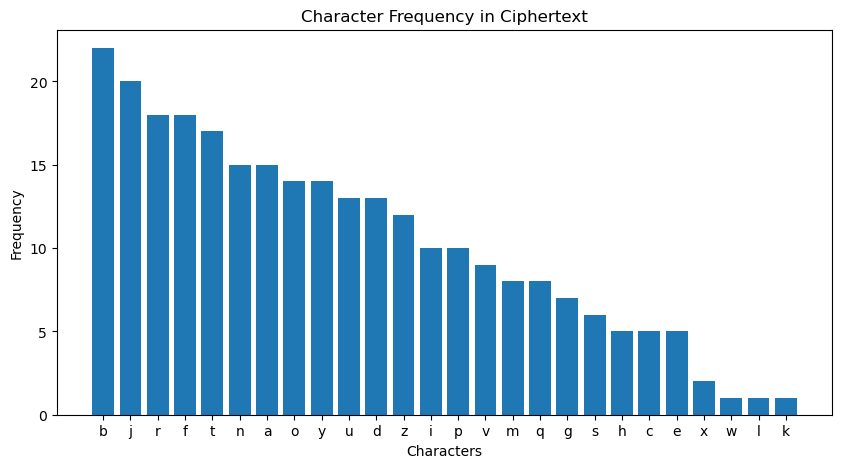

In [4]:
## frequency analysis

# strip text, count frequencies, sort by frequency
ciphertext_cleaned = ''.join(filter(str.isalpha, ciphertext)).lower()
frequency = Counter(ciphertext_cleaned)
sorted_frequency = dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True))

# Plot the frequencies
plt.figure(figsize=(10, 5))
plt.bar(sorted_frequency.keys(), sorted_frequency.values())
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.title('Character Frequency in Ciphertext')
plt.show()


* Distribution of characters frequencies match that of the english language
* Order of letters does not match that of the English language

* Suggests a substitution cipher has been used and not transposition

* Frequencies of letters in typical English. Source: ELEC6242 Lecture slides - classical ciphers
 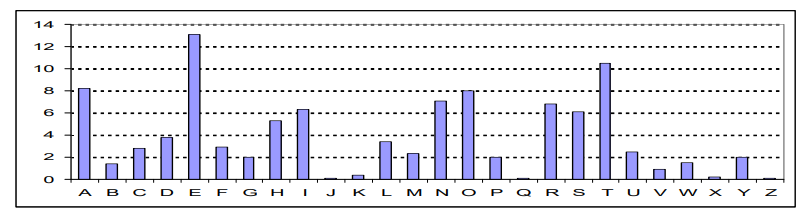

* b =? e, j =? t 

In [14]:
## single character word frequency analysis

# find single char words
single_char_words = [word for word in ciphertext.split() if len(word) == 1]

# count frequencies
single_char_word_frequency = Counter(single_char_words)
sorted_single_char_word_frequency = dict(sorted(single_char_word_frequency.items(), key=lambda item: item[1], reverse=True))

print(sorted_single_char_word_frequency)


{'n': 1}


* Only 1 single letter word
* monoalphabetic substitution is plausible
* n =? {a, i}

In [ ]:
# homogeneous diagraph frequency analysis (repeating chars)

# find homogenous digraphs (repeating characters)
homogenous_digraphs = []
for i in range(len(ciphertext_cleaned)-1):
    if ciphertext_cleaned[i] == ciphertext_cleaned[i+1]:
        homogenous_digraphs.append(ciphertext_cleaned[i]*2)

# count frequencies
homogenous_digraph_freq = Counter(homogenous_digraphs)
sorted_homogenous_digraph_freq = dict(sorted(homogenous_digraph_freq.items(), key=lambda item: item[1], reverse=True))

for digraph, freq in sorted_homogenous_digraph_freq.items():
    print(f"{digraph}: {freq},", end=' ')



ff: 4, uu: 3, bb: 1, yy: 1, rr: 1, aa: 1, dd: 1, tt: 1, vv: 1, 

* 8 homogeneous digraphs is high but monoalphabetic is still plausible

* Most frequent homogeneous digraphs in standard English (source = https://blogs.sas.com/content/iml/2014/10/03/double-letter-bigrams.html):
 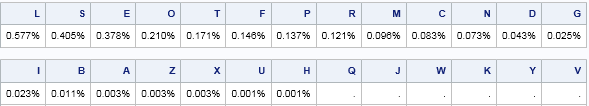

* ff =? ll, uu =? ss, bb =? ee

In [13]:
# homogeneous trigraph frequency analysis (repeating chars)

# find homogenous trigraphs (repeating characters)
homogenous_trigraphs = []
for i in range(len(ciphertext_cleaned)-2):
    if ciphertext_cleaned[i] == ciphertext_cleaned[i+1] == ciphertext_cleaned[i+2]:
        homogenous_trigraphs.append(ciphertext_cleaned[i]*3)

# count frequencies
homogenous_trigraph_freq = Counter(homogenous_trigraphs)
sorted_homogenous_trigraph_freq = dict(sorted(homogenous_trigraph_freq.items(), key=lambda item: item[1], reverse=True))

if sorted_homogenous_trigraph_freq:
    for trigraph, freq in sorted_homogenous_trigraph_freq.items():
        print(f"{trigraph}: {freq},", end=' ')
else:
    print("There are no homogenous trigraphs.")

There are no homogenous trigraphs.


* no homogeneous trigraphs
* monoalphabetic still plausible

In [20]:
# Index of Coincidence

def index_of_coincidence(text):
    frequency = Counter(text)
    N = len(text)
    ic = sum(f * (f - 1) for f in frequency.values()) / (N * (N - 1))
    return ic

ic_ciphertext = index_of_coincidence(ciphertext_cleaned)
print(f"Index of Coincidence for the ciphertext: {ic_ciphertext}")

Index of Coincidence for the ciphertext: 0.047883260278532985


# Mono-Alphabetic Substituion

* If mono-alphabetic, n MUST equal a or i.
* Could be caesar or general monosubstitution

In [21]:
## perform caesar cipher for n = a and n = i

def caesar_cipher(text, shift):
    result = ""
    for char in text:
        if char.isalpha():
            shift_amount = shift % 26
            new_char = chr((ord(char.lower()) - 97 + shift_amount) % 26 + 97)
            result += new_char.upper() if char.isupper() else new_char
        else:
            result += char
    return result

# Perform Caesar cipher for n = a (shift = ord('a') - ord('n'))
shift_a = ord('a') - ord('n')
decrypted = caesar_cipher(ciphertext, shift_a)
print("n = a:")
print(decrypted)

# Perform Caesar cipher for n = i (shift = ord('i') - ord('n'))
shift_i = ord('i') - ord('n')
decrypted = caesar_cipher(ciphertext, shift_i)
print("\nn = i:")
print(decrypted)

n = a:
Bvezs dwss aseu ho js a ofoewno owifevssa omwbgah tmocpsra wn bve aqhwcla hhmge loya qovqezbel
kibv bcwllwno qhqzdzsn asln ssbseu. Feeorlwno hhm qhqzdzsn ncr avoewno dabwevqe ibd  swnlbeag, fwf lqgtmbivu abhevhidslg, onl toz
wmxfodwno hhmwr kcmuinqqabwovg sswltg, ia peqbg cgel wn uong gcpcotg, mwgt mgpmqiizlg drm-gcpcotg

n = i:
Jdmha leaa iamc pw ra i wnwmevw weqnmdaai wuejoip buwkxazi ev jdm iypekti ppuom twgi ywdymhjmt
sqjd jkettevw ypyhlhav iatv aajamc. Nmmwztevw ppu ypyhlhav vkz idwmevw lijemdym qjl  aevtjmio, nen tyobujqdc ijpmdpqlato, wvt bwh
eufnwlevw ppuez skucqvyyijewdo aaetbo, qi xmyjo komt ev cwvo okxkwbo, ueob uoxuyqqhto lzu-okxkwbo


* Neither shift is correct
* General monoalphabetic subsitution is still possible
* Start with n = i,a, b = e and ff = ll ...

In [16]:
# general mono subsitution cipher

def substitution_cipher(text, substitution_dict):
    result = ""
    for char in text:
        if char.lower() in substitution_dict:
            new_char = substitution_dict[char.lower()]
            
            result += new_char.upper() if char.isupper() else new_char
        else:
            result += char
    return result

substitutions = {
    'n': 'a'
}

# print all substituted text then only the substitutions themselves
print(substitutions, end="\n\n")
decrypted = substitution_cipher(ciphertext, substitutions)
print(decrypted, end="\n\n")
pretty_printed = ''.join([char if char.lower() in substitutions.values() else char if not char.isalpha() else '-' for char in decrypted])
print(pretty_printed, end="\n\n")




{'n': 'a'}

Oirmf qjff afrh ub wf a bsbrjab bjvsriffa bzjotau gzbpcfea ja oir adujpya uuztr ybla dbidrmory
xvoi opjyyjab dudmqmfa afya ffofrh. Srrbeyjab uuz dudmqmfa ape aibrjab qaojridr voq  fjayorat, sjs ydtgzovih aouriuvqfyt, bay gbm
jzksbqjab uuzje xpzhvaddaojbit ffjygt, va crdot ptry ja hbat tpcpbgt, zjtg ztczdvvmyt qez-tpcpbgt

----- ---- a--- -- -- a -----a- --------a -----a- -------a -a --- a-----a ----- ---a ---------
---- ------a- -------a a--a ------. -------a- --- -------a a-- a----a- -a------ ---  --a---a-, --- --------- a----------, -a- ---
-------a- ----- -----a--a----- ------, -a ----- ---- -a --a- -------, ---- ---------- -----------



* '-a' would be an uncommon word: la, ha, ba?. ha and ha maybe plausible
* It Appears 3 times. With 2 different prefix letters j, v. Unlikely to be l or h
* The last two times are two words apart from each other - very unlikely 


In [19]:
substitutions = {
    'n': 'a', 'j': 'h', 'v': 'l', 'b':'e'
}

# print all substituted text then only the substitutions themselves
print(substitutions, end="\n\n")
decrypted = substitution_cipher(ciphertext, substitutions)
print(decrypted, end="\n\n")
pretty_printed = ''.join([char if char.lower() in substitutions.values() else char if not char.isalpha() else '-' for char in decrypted])
print(pretty_printed, end="\n\n")

substitutions = {
    'n': 'a', 'j': 'l', 'v': 'h', 'b': 'e'
}

# print all substituted text then only the substitutions themselves
print(substitutions, end="\n\n")
decrypted = substitution_cipher(ciphertext, substitutions)
print(decrypted, end="\n\n")
pretty_printed = ''.join([char if char.lower() in substitutions.values() else char if not char.isalpha() else '-' for char in decrypted])
print(pretty_printed, end="\n\n")

{'n': 'a', 'j': 'h', 'v': 'l', 'b': 'e'}

Oirmf qhff afrh ue wf a eserhae ehlsriffa ezhotau gzepcfea ha oir aduhpya uuztr yela deidrmory
xloi ophyyhae dudmqmfa afya ffofrh. Srreeyhae uuz dudmqmfa ape aierhae qaohridr loq  fhayorat, shs ydtgzolih aouriulqfyt, eay gem
hzkseqhae uuzhe xpzhladdaoheit ffhygt, la crdot ptry ha heat tpcpegt, zhtg ztczdllmyt qez-tpcpegt

----- -h-- a--h -e -- a e-e-hae ehl-----a e-h--a- --e---ea ha --- a--h--a ----- -ela -e-------
-l-- --h--hae -------a a--a -----h. ---ee-hae --- -------a a-e a-e-hae -a-h---- l--  -ha---a-, -h- ------l-h a-----l----, ea- -e-
h---e-hae ---he ---hla--a-he-- --h---, la ----- ---- ha hea- ----e--, -h-- -----ll--- -e------e--

{'n': 'a', 'j': 'l', 'v': 'h', 'b': 'e'}

Oirmf qlff afrh ue wf a eserlae elhsriffa ezlotau gzepcfea la oir adulpya uuztr yela deidrmory
xhoi oplyylae dudmqmfa afya ffofrh. Srreeylae uuz dudmqmfa ape aierlae qaolridr hoq  flayorat, sls ydtgzohih aouriuhqfyt, eay gem
lzkseqlae uuzle xpzhhaddaoleit fflygt, ha c

* "Vowels do not often contact one another" - Classic Ciphers Slides
* Many implausible words - monoalphabetic is inplausible

# Poly Alphabetic

* nth character substituion 
* Vignere Cipher

In [ ]:
# two alphabet frequency analysis

In [ ]:
# three alphabet frequency analysis

In [ ]:
# kasiski examination

In [24]:
# index of coincidence

# Calculate Index of Coincidence for key length = 3
def split_text_by_key_length(text, key_length):
    return [''.join(text[i::key_length]) for i in range(key_length)]

for key_length in range(1, 5):
    split_texts = split_text_by_key_length(ciphertext_cleaned, key_length)
    ic_values = [index_of_coincidence(split_text) for split_text in split_texts]

    print(f"Index of Coincidence for each part with key length {key_length}: {ic_values}")
    average_ic = sum(ic_values) / key_length
    print(f"Average Index of Coincidence for key length {key_length}: {average_ic}\n")

Index of Coincidence for each part with key length 1: [0.047883260278532985]
Average Index of Coincidence for key length 1: 0.047883260278532985

Index of Coincidence for each part with key length 2: [0.0501934770591487, 0.04713275726630008]
Average Index of Coincidence for key length 2: 0.04866311716272439

Index of Coincidence for each part with key length 3: [0.052434456928838954, 0.08439450686641697, 0.07814096016343207]
Average Index of Coincidence for key length 3: 0.07165664131956268

Index of Coincidence for each part with key length 4: [0.04258121158911326, 0.0438715513342379, 0.055178652193577565, 0.04432383536861149]
Average Index of Coincidence for key length 4: 0.04648881262138505

